# Image Compression using K-Means clustering and deploy it into WebApp

The goal is to use k-means clustering to compress the image to a lower level, reducing the size of the original image.

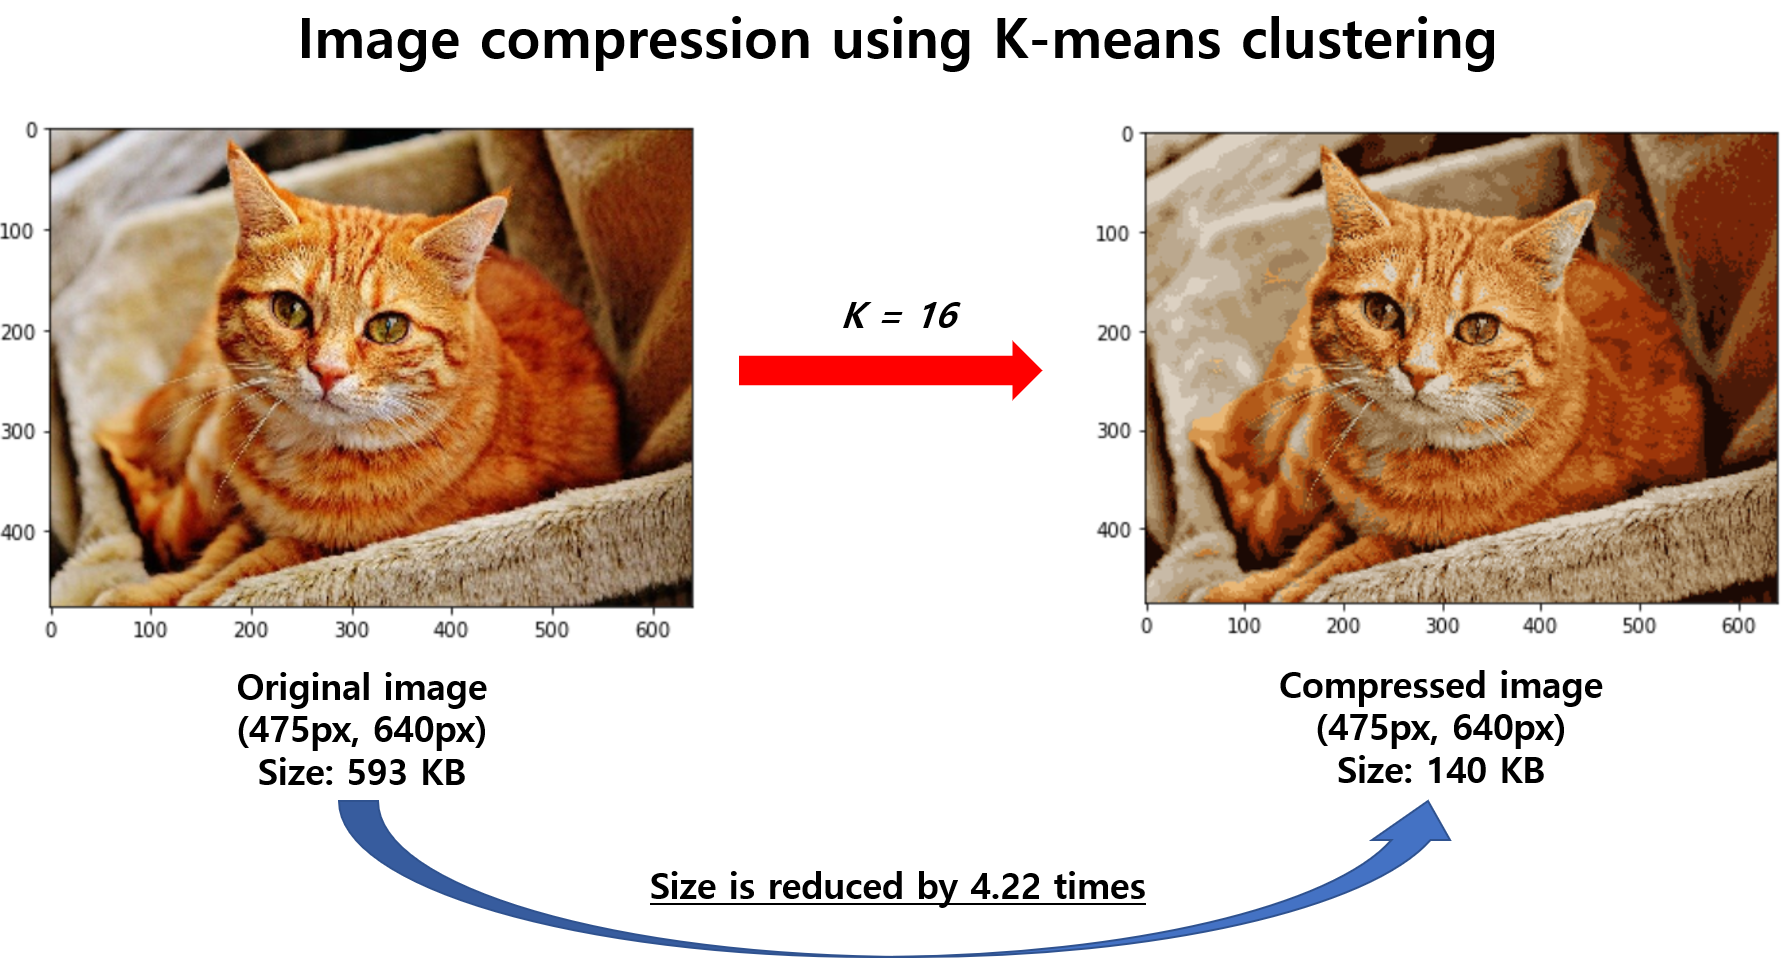


## How does the K-Means Clustering technique compress the image?

In a colored image, each pixel is of size 3 bytes (RGB), where each color can have intensity values from 0 to 255. Following combinatorics, the total number of colors which can be represented is 256x256x256 (equal to 16,777,216). Practically, we can visualize only a few colors in an image very less than the above number. So the k-Means Clustering algorithm takes advantage of the visual perception of the human eye and uses few colors to represent the image. Colors having different values of intensity that are RGB values seem the same to the human eye. The K-Means algorithm takes this advantage and clubs similar looking colors (which are close together in a cluster). Here’s an illustration of how this works:

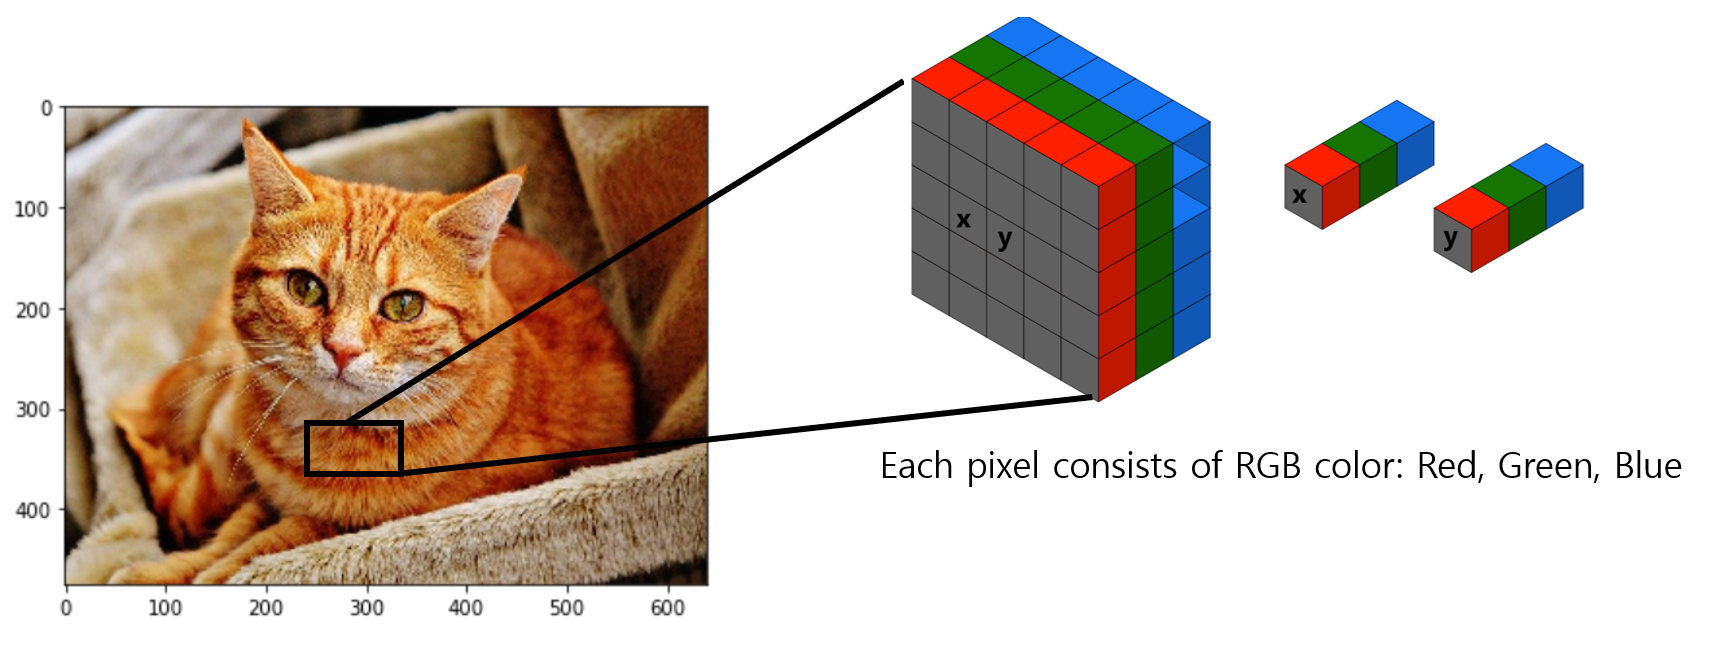

It is observed that for some amount of changes in the RGB values the color resembles the same to a human eye. So k-Means clustering can group these two colors together and can be represented by a centroid point that has almost the same resemblance to a human eye.

If we have an image with initial dimension is 475x640 pixels. For each pixel, the image has 3-dimension representing RGB intensity values. The RGB intensity values range from 0 to 255. Since intensity value has 256 values (2**8), so the storage required to store each pixel value is 3x8 bits. The initial size of the image will be (475x640x3x8) bits.

Total number of color combination equals (256x256x256) ( equal to 16,777,216). As the human eye is not able to perceive so many numbers of colors at once, so the idea is to group similar colors together and use fewer colors to represent the image.

We will be using k-Means clustering to find k number of colors which will be representative of its similar colors. These k-colors will be centroid points from the algorithm. Then we will replace each pixel value with its centroid points. The color combination formed using only k values will be very less compared to the total color combination. We will try different values of k and observe the output image.

Several libraries will be used in this practice, including:
- skimage: https://scikit-image.org/
- sklearn: https://scikit-learn.org/stable/
- matplotlib: https://matplotlib.org/
- numpy: https://numpy.org/

In [ ]:
# run this if you haven't install the required libraries
!pip install scikit-image # to install skimage
!pip install scikit-learn # to install sklearn
!pip install matplotlib # to install matplotlib
!pip install numpy # to install numpy

In [ ]:
# load the libraries
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

#enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written
%matplotlib inline 

In [ ]:
# reading the cat image
cat_img = io.imread('cat.png')

In [ ]:
# display the cat image
io.imshow(cat_img);

In [ ]:
# show the shape of the cat_img
cat_img.shape

In [ ]:
# display the cat_img data
cat_img

In [ ]:
# define pre-processing image function
def preprocess_img(image):
    # get the height and width of the image
    rows, cols = image.shape[0], image.shape[1]
    
    # Gives a new shape to an array without changing its data.
    # Docs: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    # reshape the image into a rows*cols with 3 columns array so that each row represents a pixel and the three columns represent the Red, Green, and Blue values.
    image = image.reshape(rows * cols, 3)
    
    return image, rows, cols

In [ ]:
# call the preprocess_img function
preprocessed_img, rows, cols  = preprocess_img(cat_img)

In [ ]:
# show the shape of the preprocessed_img
preprocessed_img.shape

In [ ]:
# display the preprocessed_img data
preprocessed_img

In [ ]:
# define image_compression function
def image_compression(size, image):
    # size is the number of clusters
    kmeans = KMeans(n_clusters = size)
    # fit the data
    kmeans.fit(image)
    # Replace each pixel value with its nearby centroid:
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    # Clip (limit) the values in an array
    # Docs: https://numpy.org/doc/stable/reference/generated/numpy.clip.html
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    
    return compressed_image

In [ ]:
# run the image compression using k-means clustering algorithm
kvalue = 16 # size/number of clusters
compressed_img = image_compression(kvalue, preprocessed_img)

In [ ]:
compressed_img.shape

In [ ]:
compressed_img

In [ ]:
# reshape the array to it's original shape (rows, cols, 3)
compressed_img = compressed_img.reshape(rows, cols, 3)

compressed_img.shape

In [ ]:
# Save and display output image:
io.imsave('cat_compressed_%s.png' % (kvalue), compressed_img)

# display the compressed image
io.imshow(compressed_img)

In [ ]:
# display the original image
io.imshow(cat_img)

In [ ]:
# check the file size of original image with the compressed one
import os

original_img_size = os.path.getsize('cat.png')
compressed_img_size = os.path.getsize('cat_compressed_%s.png' % (kvalue))

print("Original image size is:", original_img_size/1000, "KB")
print("Compressed image size is:", compressed_img_size/1000, "KB")
reduced_by = round(original_img_size/compressed_img_size,2)
print("The size is reduced by", reduced_by,"times")

## MongoDB database

In [ ]:
# get username
import getpass
username = getpass.getuser()

print("Current username is:",username) # print out current username that will be used for your MongoDB Database Name

In [ ]:
import datetime
from pymongo import MongoClient
from bson.objectid import ObjectId

# 127.0.0.1 is the local mongodb address installed
client = MongoClient('mongodb://127.0.0.1:27017/')

# YOU SHOULD change '<<yourUSERNAME>>' with username: userSTUDENTID (for example: user22222)
db = client['<<yourUSERNAME>>'] #<<yourUSERNAME>>

In [ ]:
# function to save the new sentence into mongodb
def save_to_mongodb(new_record):
    #image_compression is the collection (table) name in our mongodb database
    image_compression = db['image_compression']

    # Insert one record
    image_compression.insert_one(new_record)

In [ ]:
# function to retrieve last data from mongodb
def retrieve_lastdata(limit):
    #image_compression is the collection (table) name in our mongodb database
    image_compression = db['image_compression']
    # retrieve last 5 data (limit = 5)
    # sort by _id, -1 -> desc; 1 -> asc
    data = image_compression.find().sort("_id", -1).limit(int(limit))
        
    return data

In [ ]:
# function to retrieve data by _id from mongodb
def retrieve_data_byid(id):
    #image_compression is the collection (table) name in our mongodb database
    image_compression = db['image_compression']
    data = image_compression.find_one({'_id':ObjectId(id)})
        
    return data

In [ ]:
# save the new data into mongodb
filename = "cat.png"
filename_compressed = 'cat_compressed_%s.png' % (kvalue)

# new record data, formatted in json
new_record = { 
    'original_file': filename,
    'compressed_file': filename_compressed,
    'original_size': original_img_size/1000, 
    'compressed_size': compressed_img_size/1000,
    'kvalue': kvalue,
    'reduced_by': reduced_by,
    'created_at': datetime.datetime.now()
}

save_to_mongodb(new_record)

In [ ]:
# copy the both images to webapp/static/uploaded_images
!cp $filename $filename_compressed webapp/static/uploaded_images/

In [ ]:
# retrieve last data from mongodb database
limit = 5
data = retrieve_lastdata(limit)
for d in data:
    print(d)

In [ ]:
# find data by _id from mongodb
id = "629787f1b57a065ebf1ae62e" # change this based on the data above 
data = retrieve_data_byid(id)
print(data)

## Now let's create a web app so that it can be useful :)

Check ```kmeans-webapp.py``` file inside ```webapp/``` directory/folder 

**and change the port number, available from 5200-5221** 
     (there are 21 port slots, please choose one and post in the chat 
     so that other student can choose the available one)

Move to ```webapp``` directory and execute the ```kmeans-webapp.py``` file, by typing these in the terminal:
    
``` cd webapp ```

``` python kmeans-webapp.py ```


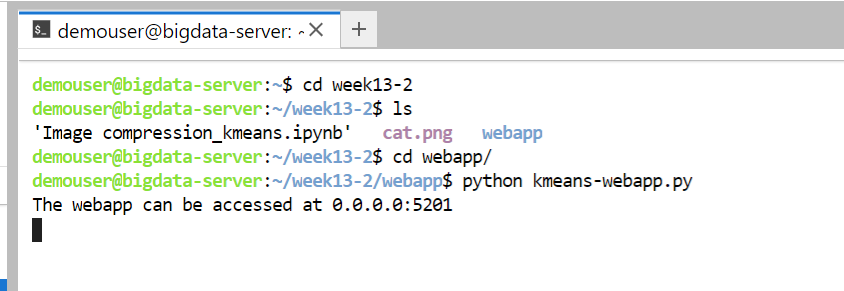